# Data Augmentation

## 本章節大綱
* [翻轉 Flip](#翻轉-Flip)
* [平移 Shift](#平移-Shift)
* [旋轉 Rotation](#旋轉-Rotation)
* [剪裁 Shear](#剪裁-Shear)
* [縮放 Zoom](#縮放-Zoom)
* [補值 Fill](#補值-Fill)
* [亮度 Brightness](#亮度-Brightness)
* [校正 Normalization](#校正-Normalization)
* [顏色平移 Channel Shift](#顏色平移-Channel-Shift)
* [自訂函數 Preprocessing Function](#自訂函數-Preprocessing-Function)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
datapath = "./example_data_augmentation"
datalist = os.listdir(datapath)

FileNotFoundError: ignored

In [ ]:
classlabel = {0:'cat', 1:'dog'}

In [ ]:
num = 8

x_train = []
for eachname in datalist['file_name'].values[:num]:
    img = cv2.imread(eachname)
    img = cv2.resize(img, (256, 256))
    x_train.append(img[:,:,::-1].astype('float32'))

x_train = np.array(x_train)
y_train = datalist['type'].values[:num]

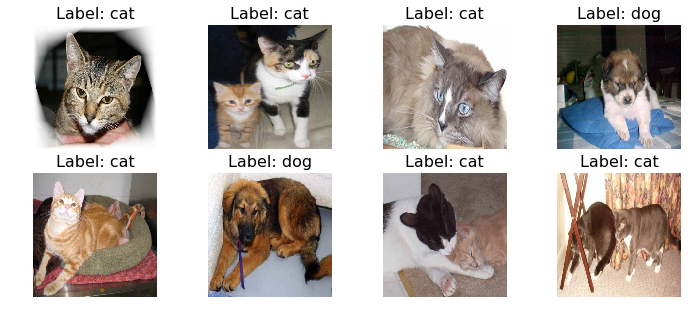

In [ ]:
plt.figure(figsize=(12,5))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i].astype('uint8'))
    plt.title("Label: {}".format(classlabel[y_train[i]]), fontsize=16)
    plt.axis('off')
plt.show()

In [ ]:
def my_plot(x_data, y_data, batch_size=8):
    plt.figure(figsize=(12,5))
    for i in range(batch_size):
        plt.subplot(2,4,i+1)
        plt.imshow(x_data[i].astype('uint8'))
        plt.title("Label: {}".format(classlabel[y_data[i]]), fontsize=16)
        plt.axis('off')
    plt.show()

* ## 翻轉 Flip

 * horizontal_flip：True or False (default：False)
 * vertical_flip：True or False (default：False)
 * 如果為 True，隨機決定是否執行水平或垂直翻轉

In [ ]:
datagen = ImageDataGenerator(
                             horizontal_flip=True, 
                             vertical_flip=True,
                             )

In [ ]:
datagenerator = datagen.flow(x_train, y_train, batch_size=8)
x_augment, y_augment = datagenerator.next()

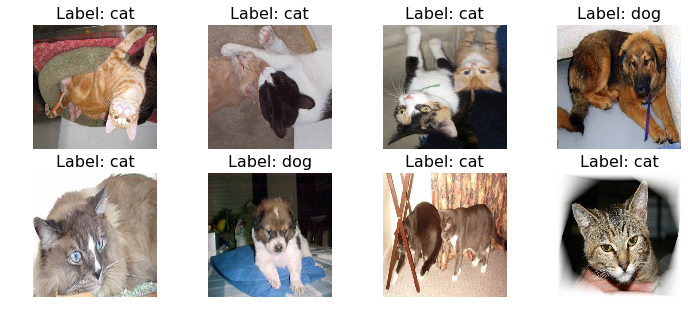

In [ ]:
my_plot(x_augment, y_augment)

[(back...)](#本章節大綱)

* ## 平移 Shift
 * width_shift_range：0 ~ 1 (default：0)
 * height_shift_range：0 ~ 1 (default：0)
 * 隨機從 0 ~ width_shift_range * image_width 取一個位移量平移

In [ ]:
datagen = ImageDataGenerator(
                             width_shift_range=0.5, 
                             height_shift_range=0.5
                             )

In [ ]:
datagenerator = datagen.flow(x_train, y_train, batch_size=8)
x_augment, y_augment = datagenerator.next()

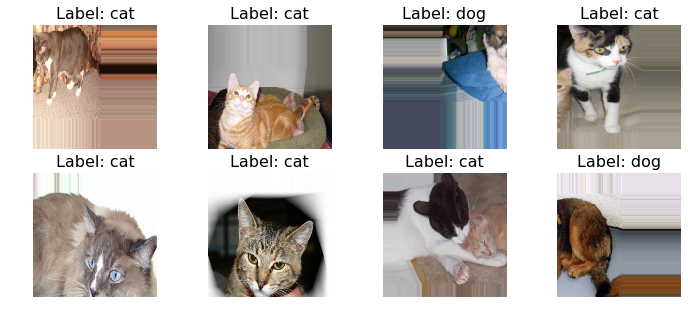

In [ ]:
my_plot(x_augment, y_augment)

 * fill_mode：自行選擇如何補值
 * cval：指定補入的顏色值

In [ ]:
datagen = ImageDataGenerator(
                             width_shift_range=0.5, 
                             height_shift_range=0.5,
                             fill_mode='constant',
                             cval=0
                             )

In [ ]:
datagenerator = datagen.flow(x_train, y_train, batch_size=8)
x_augment, y_augment = datagenerator.next()

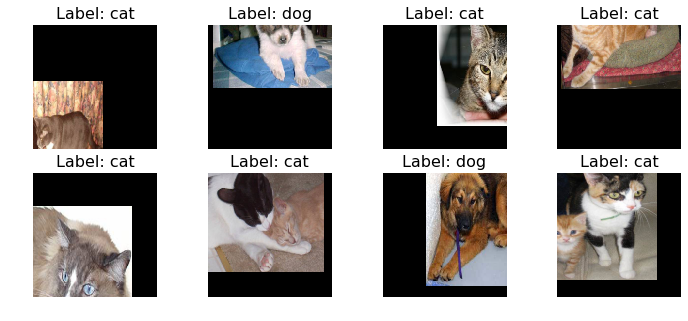

In [ ]:
my_plot(x_augment, y_augment)

[(back...)](#本章節大綱)

* ## 旋轉 Rotation
 * rotation_range：整數，0 ~ 360  (default：0)
 * 隨機從 0 ~ rotation_range 選取角度，任意順時或逆時旋轉

In [ ]:
datagen = ImageDataGenerator(
                             rotation_range=60, 
                             fill_mode='constant',
                             cval=0
                             )

In [ ]:
datagenerator = datagen.flow(x_train, y_train, batch_size=8)
x_augment, y_augment = datagenerator.next()

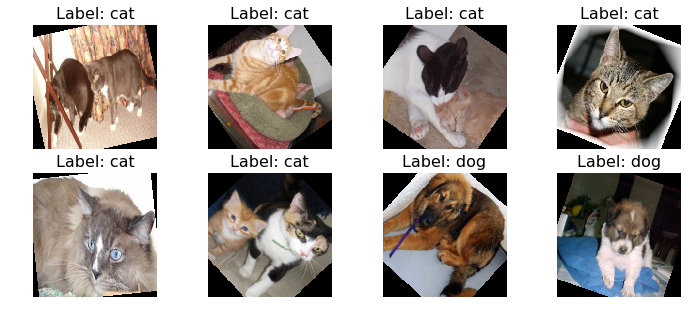

In [ ]:
my_plot(x_augment, y_augment)

[(back...)](#本章節大綱)

* ## 剪裁 Shear

 * shear_range：整數，0 ~ 90  (default：0)
 * 隨機從 0 ~ shear_range 選取角度，任意順時或逆時做形變
 * 通常會搭配 shift_range 一起使用

In [ ]:
datagen = ImageDataGenerator(
                             shear_range=60,
                             width_shift_range=0.5,
                             fill_mode='constant',
                             )

In [ ]:
datagenerator = datagen.flow(x_train, y_train, batch_size=8)
x_augment, y_augment = datagenerator.next()

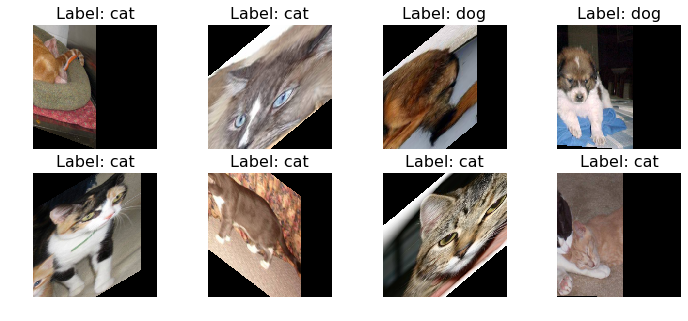

In [ ]:
my_plot(x_augment, y_augment)

[(back...)](#本章節大綱)

* ## 縮放 Zoom
 * zoom_range：浮點數 or [lower, upper] (default：0)
 * 如果 zoom_range < 0，任以選取倍數 1 ~ 1/zoom_range 之間放大
 * 如果 zoom_range > 0，任以選取倍數 1 ~ zoom_range 之間縮小 
 * 如果填入浮點數[lower, upper] = [1-zoom_range, 1+zoom_range]

In [ ]:
datagen = ImageDataGenerator(
                             zoom_range=[0.2,1], 
                             fill_mode='constant',
                             cval=0
                             )

In [ ]:
datagenerator = datagen.flow(x_train, y_train, batch_size=8)
x_augment, y_augment = datagenerator.next()

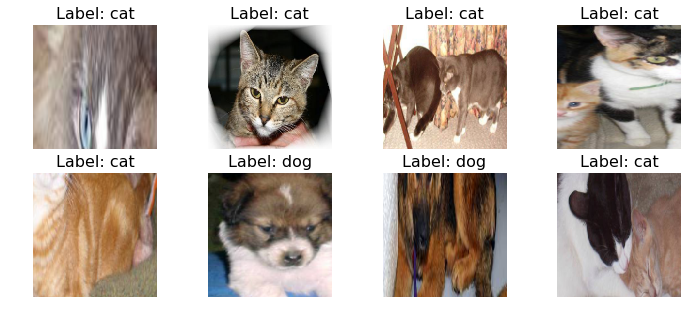

In [ ]:
my_plot(x_augment, y_augment)

In [ ]:
datagen = ImageDataGenerator(
                             zoom_range=[1,4], 
                             fill_mode='constant'
                             )

In [ ]:
datagenerator = datagen.flow(x_train, y_train, batch_size=8)
x_augment, y_augment = datagenerator.next()

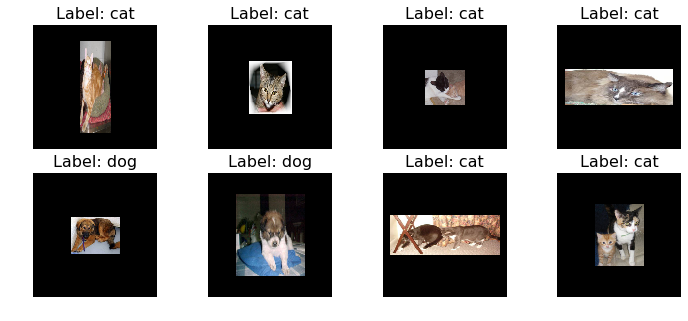

In [ ]:
my_plot(x_augment, y_augment)

[(back...)](#本章節大綱)

* ## 補值 Fill
 * fill_mode：有 'nearest', 'constant', 'reflect', 'wrap'，四種方法可選擇  (default：'nearest')
 * cval：指定補入的顏色值 (default：0)

Mode: nearest



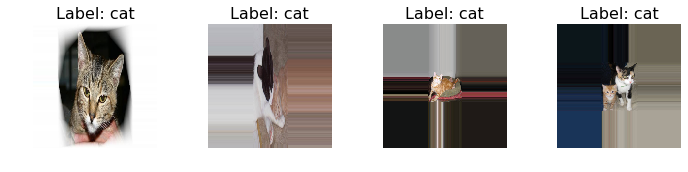

----------------------------------------------------------------------------------------------------
Mode: constant



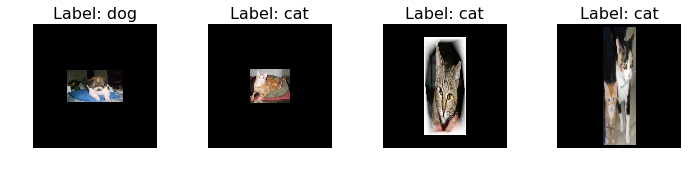

----------------------------------------------------------------------------------------------------
Mode: reflect



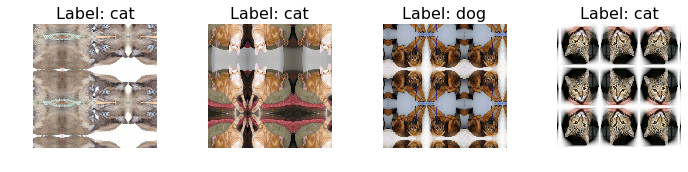

----------------------------------------------------------------------------------------------------
Mode: wrap



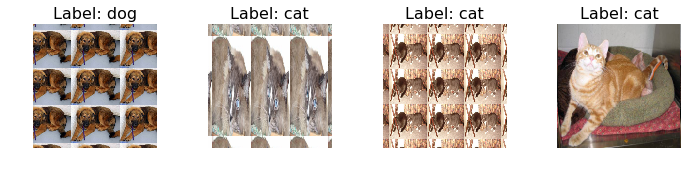

----------------------------------------------------------------------------------------------------


In [ ]:
mode_list = ['nearest', 'constant', 'reflect', 'wrap']

for eachmode in mode_list:
    print("Mode: {}\n".format(eachmode))
    datagen = ImageDataGenerator(
                                 zoom_range=[1,4], 
                                 fill_mode=eachmode
                                 )
    datagenerator = datagen.flow(x_train, y_train, batch_size=4)
    x_augment, y_augment = datagenerator.next()
    
    my_plot(x_augment, y_augment, batch_size=4)
    print("-"*100)

[(back...)](#本章節大綱)

* ## 亮度 Brightness
 * brightness_range：Tuple or list of two floats  (default：'nearest')
 * 隨機在這個 range 中，平移亮度

In [ ]:
datagen = ImageDataGenerator(
                             brightness_range=[0,3]
                             )

In [ ]:
datagenerator = datagen.flow(x_train, y_train, batch_size=4)
x_augment, y_augment = datagenerator.next()

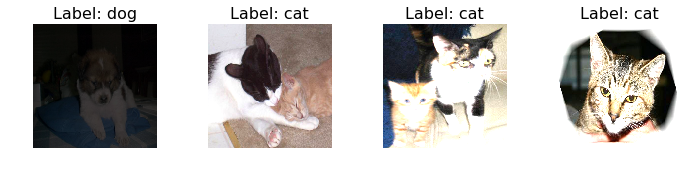

In [ ]:
my_plot(x_augment, y_augment, batch_size=4)

[(back...)](#本章節大綱)

* ## 校正 Normalization
 * rescale：直接輸入需要乘入的值

In [ ]:
datagen = ImageDataGenerator(
                             rescale=1./255.
                             )

In [ ]:
datagenerator = datagen.flow(x_train, y_train, batch_size=8)

x_augment, y_augment = datagenerator.next()

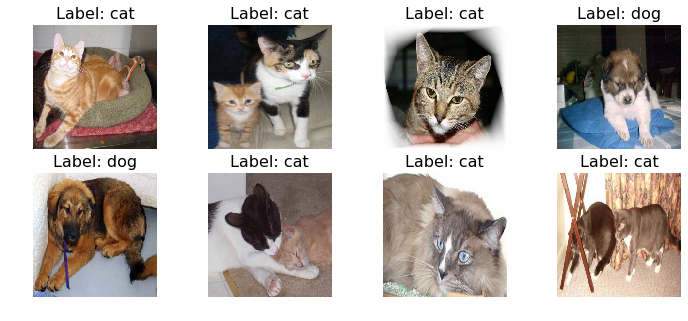

In [ ]:
plt.figure(figsize=(12,5))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_augment[i])
    plt.title("Label: {}".format(classlabel[y_augment[i]]), fontsize=16)
    plt.axis('off')
plt.show()

In [ ]:
print(x_train.min(), x_train.max())
print(x_augment.min(), x_augment.max())

0.0 255.0
0.0 1.0


 * featurewise_center: True or False (default：False) 將影像 channel-wise 的平均值設為 0。
 * featurewise_std_normalization: True or False (default：False) 將輸入影像除以整筆資料 channel-wise 的標準差

In [ ]:
datagen = ImageDataGenerator(
                             featurewise_center = True,
                             featurewise_std_normalization=True
                             )

In [ ]:
datagen.fit(x_train)

In [ ]:
datagenerator = datagen.flow(x_train, y_train, batch_size=8)
x_augment, y_augment = datagenerator.next()

In [ ]:
print(x_augment.min(), x_augment.max())

-1.9734815 2.0045314


In [ ]:
# 使用 numpy 推敲出 Generator 中的計算公式

img_mean = x_train.mean((0,1,2)).reshape(1,1,1,3)
img_std = x_train.std((0,1,2)).reshape(1,1,1,3)
new_img = (x_train-img_mean)/img_std
print(new_img.min(), new_img.max())

-1.9737467 2.0045385


 * samplewise_center: True or False (default：False) 將每張影像平均值設為 0。
 * samplewise_std_normalization: True or False (default：False) 將輸入的每張影像除以其本身的標準差
 * $\color{red}{ 一般來說，不建議使用這個，可能會造成色彩或明亮的顏色扭曲}$

In [ ]:
datagen = ImageDataGenerator(
                             samplewise_center=True,
                             samplewise_std_normalization=True
                             )

In [ ]:
datagen.fit(x_train)

In [ ]:
datagenerator = datagen.flow(x_train, y_train, batch_size=8)
x_augment, y_augment = datagenerator.next()
print(x_augment.min(), x_augment.max())

-3.1501088 2.3552866


In [ ]:
# 使用 numpy 推敲出 Generator 中的計算公式

img_mean = x_train.mean((1,2,3)).reshape(8,1,1,1)
img_std = x_train.std((1,2,3)).reshape(8,1,1,1)
new_img = (x_train-img_mean)/img_std
print(new_img.min(), new_img.max())

-3.1501088 2.3552866


[(back...)](#本章節大綱)

* ## 顏色平移 Channel Shift
 * channel_shift_range：浮點數
 * 對 channel 加入隨機的顏色平移量

In [ ]:
datagen = ImageDataGenerator(
                             channel_shift_range=120
                             )

In [ ]:
datagenerator = datagen.flow(x_train, y_train, batch_size=8)
x_augment, y_augment = datagenerator.next()

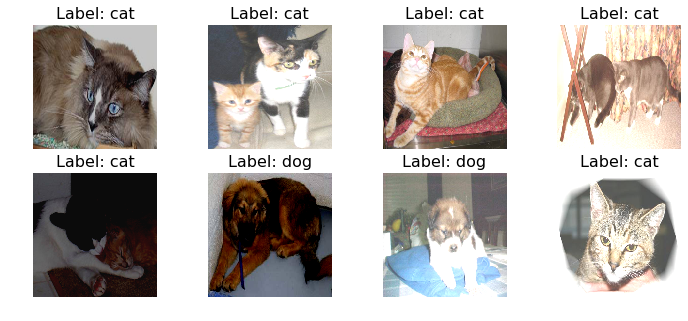

In [ ]:
my_plot(x_augment, y_augment, batch_size=8)

[(back...)](#本章節大綱)

* ## 自訂函數 Preprocessing Function

In [ ]:
import cv2

In [ ]:
def preprocess_input(img):
    edge = cv2.GaussianBlur(img, (15, 15), 5)
    return edge.astype('float32')

In [ ]:
datagen = ImageDataGenerator(
                             preprocessing_function=preprocess_input
                             )

In [ ]:
datagenerator = datagen.flow(x_train, y_train, batch_size=8)
x_augment, y_augment = datagenerator.next()

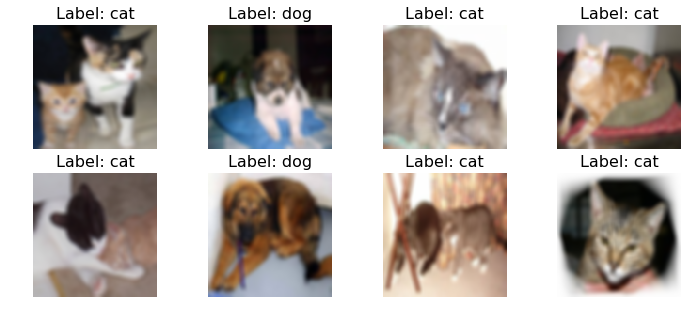

In [ ]:
my_plot(x_augment, y_augment, batch_size=8)

[(back...)](#本章節大綱)